
 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    500 non-null    object 
 1   superhost  500 non-null    bool   
 2   latitude   500 non-null    float64
 3   longitude  500 non-null    float64
 4   name       500 non-null    object 
 5   guests     500 non-null    int64  
 6   price      500 non-null    int64  
 7   roomType   500 non-null    object 
 8   stars      500 non-null    float64
 9   city       500 non-null    object 
dtypes: bool(1), float64(3), int64(2), object(4)
memory usage: 35.8+ KB
None

 Summary Stats:
         latitude   longitude      guests         price       stars
count  500.000000  500.000000  500.000000    500.000000  500.000000
mean    19.671298   74.948030   11.560000    938.062000    4.710880
std      6.499412    7.098764    4.543532   2117.821537    0.250132
min      9.418870  -73.750710   

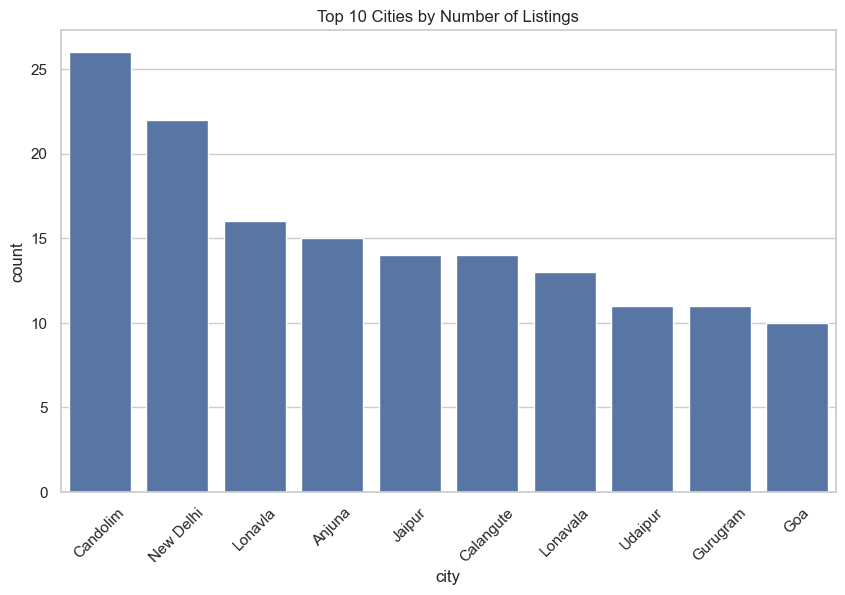

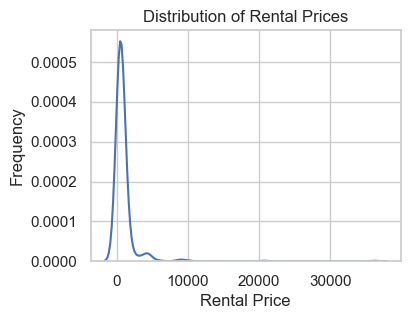

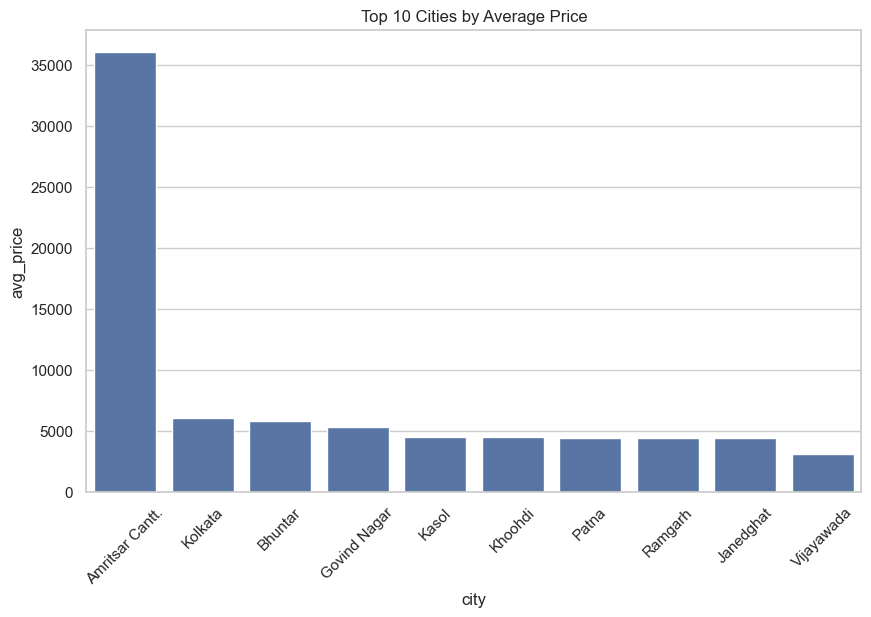

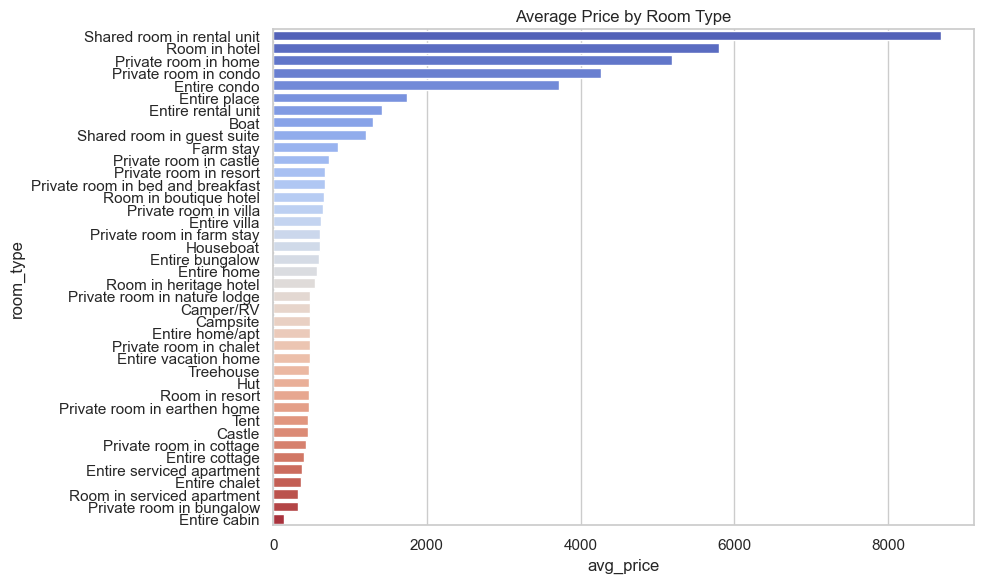

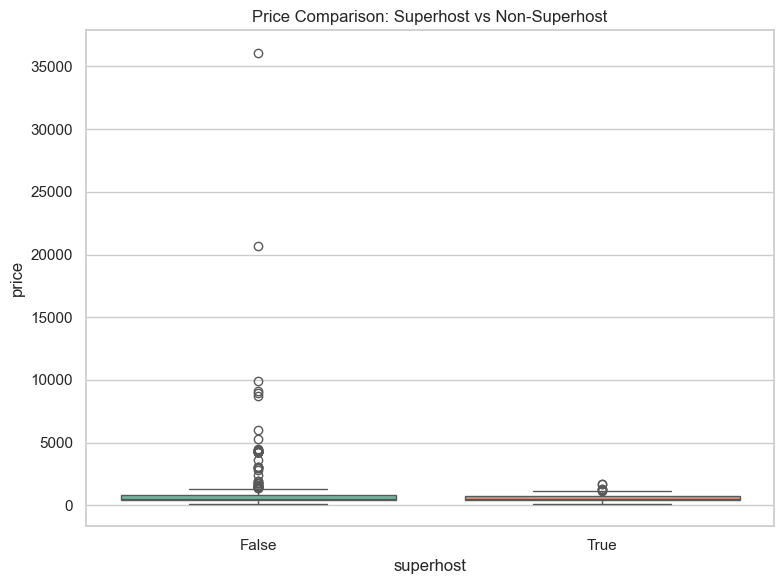

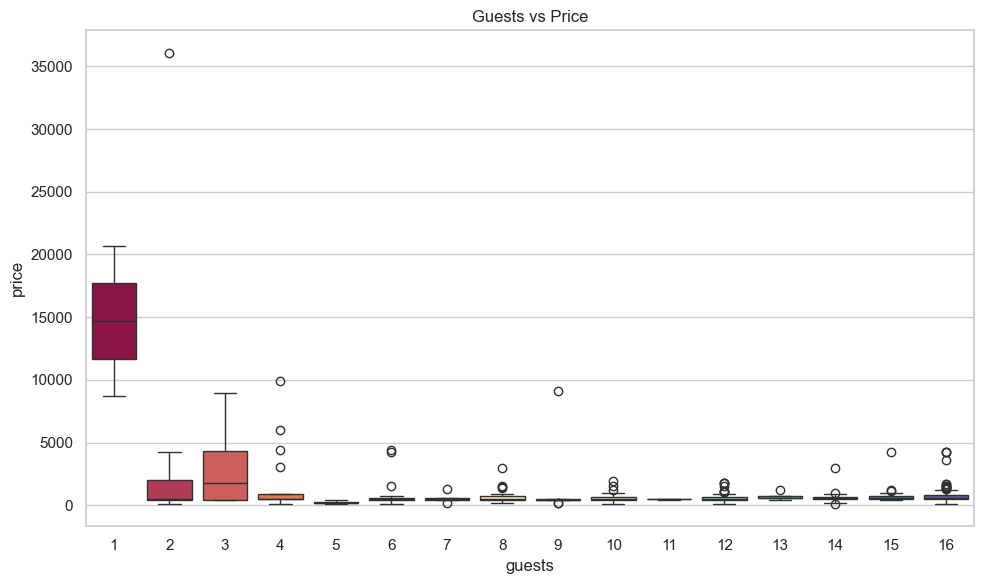

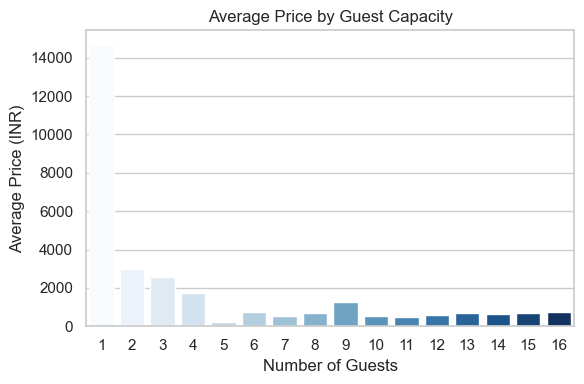

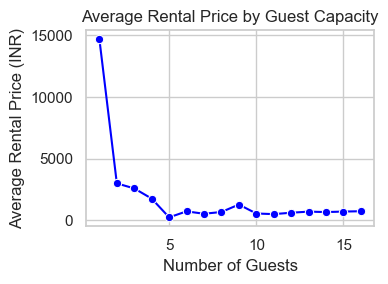

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_excel(r"E:\excell files\intership projects\AirBnB project\Airbnb_India_data.xlsx")

df.rename(columns={
    'location/lat': 'latitude',
    'location/lng': 'longitude',
    'pricing/rate/amount': 'price',
    'Superhost': 'superhost',
    'numberOfGuests': 'guests'
}, inplace=True)

# Extract city from address
df['city'] = df['address'].apply(lambda x: x.split(',')[0].strip())

#  Fill missing values for stars
df['stars'] = df['stars'].fillna(df['stars'].median())

#  Drop duplicates
df.drop_duplicates(inplace=True)

# Data Overview
print("\n Data Overview:")
print(df.info())
print("\n Summary Stats:")
print(df.describe())

# ----------------------------
#  Visual Analysis (Plots)
# ----------------------------

# Top 10 Cities
top_cities = df['city'].value_counts().head(10)
top_cities_df = top_cities.reset_index()
top_cities_df.columns = ['city', 'count']
plt.figure(figsize=(10,6))
sns.barplot(x='city', y='count', data=top_cities_df)
plt.title('Top 10 Cities by Number of Listings')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of rental prices
plt.figure(figsize=(4,3))
sns.kdeplot(df["price"])
plt.title("Distribution of Rental Prices")
plt.xlabel("Rental Price")
plt.ylabel("Frequency")
plt.show()

# Average Price by City
avg_price = df.groupby('city')['price'].mean().sort_values(ascending=False).head(10)
avg_price_df = avg_price.reset_index()
avg_price_df.columns = ['city', 'avg_price']
plt.figure(figsize=(10,6))
sns.barplot(x='city', y='avg_price', data=avg_price_df)
plt.title('Top 10 Cities by Average Price')
plt.xticks(rotation=45)
plt.show()

# Average Price by Room Type
room_price = df.groupby('roomType')['price'].mean().sort_values(ascending=False)
room_price_df = room_price.reset_index()
room_price_df.columns = ['room_type', 'avg_price']
plt.figure(figsize=(10,6))
sns.barplot(data=room_price_df, x='avg_price', y='room_type', hue='room_type', palette='coolwarm', legend=False)
plt.title("Average Price by Room Type")
plt.tight_layout()
plt.show()

# Boxplot - Superhost vs Price
plt.figure(figsize=(8,6))
sns.boxplot(x='superhost', y='price', data=df, hue='superhost', palette='Set2', legend=False)
plt.title("Price Comparison: Superhost vs Non-Superhost")
plt.tight_layout()
plt.show()

# Boxplot - Guests vs Price
plt.figure(figsize=(10,6))
sns.boxplot(x='guests', y='price', data=df, hue='guests', palette='Spectral', legend=False)
plt.title("Guests vs Price")
plt.tight_layout()
plt.show()

# Group by number of guests and calculate mean price
price_by_capacity = df.groupby('guests')['price'].mean().reset_index()

# Plot (Seaborn 0.14+ safe)
plt.figure(figsize=(6, 4))
sns.barplot(data=price_by_capacity, x='guests', y='price', hue='guests', palette='Blues', legend=False)
plt.title('Average Price by Guest Capacity')
plt.xlabel('Number of Guests')
plt.ylabel('Average Price (INR)')
plt.tight_layout()
plt.show()

# Calculate the mean rental price by guest capacity
price_by_capacity = df.groupby('guests')['price'].mean().reset_index()

# Plot the result
plt.figure(figsize=(4, 3))
sns.lineplot(x='guests', y='price', data=price_by_capacity, marker='o', color='blue')
plt.title('Average Rental Price by Guest Capacity')
plt.xlabel('Number of Guests')
plt.ylabel('Average Rental Price (INR)')
plt.tight_layout()
plt.show()


top_cities = df['city'].value_counts().head(10)
top_cities_df = top_cities.reset_index()
top_cities_df.columns = ['city', 'count']

avg_price = df.groupby('city')['price'].mean().sort_values(ascending=False).head(10)
avg_price_df = avg_price.reset_index()
avg_price_df.columns = ['city', 'avg_price']

room_price = df.groupby('roomType')['price'].mean().sort_values(ascending=False)
room_price_df = room_price.reset_index()
room_price_df.columns = ['room_type', 'avg_price']



In [8]:
top_cities_df.to_csv("Top_Cities.csv", index=False)
avg_price_df.to_csv("Average_Price_By_City.csv", index=False)
room_price_df.to_csv("Average_Price_By_RoomType.csv", index=False)

In [9]:
import os
print(os.getcwd())

e:\excell files\intership projects\AirBnB project
